In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score,f1_score
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, KFold, cross_val_score,StratifiedKFold
from sklearn.preprocessing import MinMaxScaler

In [46]:
#load the dataset
data= pd.read_csv("/Users/nidhi.anil/Downloads/train.csv")
data

,player_id,name,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,...,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
0,PLID_4964,Keva Horan,23,M,Ukraine,6'2,176lbs,77.0,58.0,47.0,...,Right,7.7,NaN,8.1,2.0,High,Talent Hunt,8.0,0.0,1
1,PLID_11234,Herma Tann,18,M,Russia,5'10,148lbs,54.0,69.0,70.0,...,Any,5.3,0.0,NaN,3.0,Medium,Source,3.0,0.0,0
2,PLID_19127,Eilene Kizer,16,F,Spain,6'2,172lbs,34.0,43.0,45.0,...,Left,4.7,0.0,6.6,5.0,Low,Academy,2.0,0.0,1
3,PLID_17467,Andrea Badgett,27,M,Chile,5'11,165lbs,79.0,73.0,76.0,...,Right,8.6,113.0,8.6,6.0,Medium,Academy,13.0,16.0,1
4,PLID_9661,Jeremiah Bumbalough,19,F,Argentina,5'8,158lbs,47.0,61.0,74.0,...,Right,NaN,0.0,5.7,5.0,Medium,Academy,4.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13989,PLID_10956,Viva Stepney,20,M,Uruguay,6'0,161lbs,60.0,48.0,62.0,...,Right,6.0,NaN,7.6,2.0,Medium,Academy,6.0,0.0,1
13990,PLID_17290,Illa Pitre,18,F,England,5'10,165lbs,53.0,68.0,59.0,...,Right,5.3,0.0,5.6,3.0,Medium,Academy,4.0,0.0,0
13991,PLID_5193,Marylouise Mosley,17,M,Japan,6'0,172lbs,56.0,73.0,62.0,...,Left,5.7,0.0,7.7,3.0,Low,Talent Hunt,2.0,0.0,1
13992,PLID_12173,Teri Escamilla,20,F,Ukraine,5'10,150lbs,71.0,69.0,70.0,...,Left,6.8,1.0,5.8,4.0,Medium,Academy,6.0,0.0,1


In [3]:
data.shape

(13994, 30)

# Basic details of the dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13994 entries, 0 to 13993
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   player_id                  13994 non-null  object 
 1   name                       13994 non-null  object 
 2   age                        13994 non-null  int64  
 3   gender                     13975 non-null  object 
 4   country                    13994 non-null  object 
 5   height                     13994 non-null  object 
 6   weight                     13577 non-null  object 
 7   ball_controlling_skills    13581 non-null  float64
 8   body_reflexes              13994 non-null  float64
 9   body_balance               13994 non-null  float64
 10  jumping_skills             13970 non-null  float64
 11  penalties_conversion_rate  13964 non-null  float64
 12  mental_strength            13966 non-null  float64
 13  goalkeeping_skills         13994 non-null  flo

Column Names

In [5]:
data.columns

Index(['player_id', 'name', 'age', 'gender', 'country', 'height', 'weight',
       'ball_controlling_skills', 'body_reflexes', 'body_balance',
       'jumping_skills', 'penalties_conversion_rate', 'mental_strength',
       'goalkeeping_skills', 'defending_skills', 'passing_skills',
       'dribbling_skills', 'shot_accuracy', 'body_strength_stamina',
       'max_running_speed', 'strong_foot', 'behaviour_rating',
       'matches_played', 'fitness_rating', 'trophies_won', 'dedication_level',
       'coaching', 'years_of_experience', 'no_of_disqualifications',
       'selection'],
      dtype='object')

Numerical Features

In [6]:
numerical = list(data.select_dtypes(include=['int64','float64']).keys())
numerical

['age',
 'ball_controlling_skills',
 'body_reflexes',
 'body_balance',
 'jumping_skills',
 'penalties_conversion_rate',
 'mental_strength',
 'goalkeeping_skills',
 'defending_skills',
 'passing_skills',
 'dribbling_skills',
 'shot_accuracy',
 'body_strength_stamina',
 'max_running_speed',
 'behaviour_rating',
 'matches_played',
 'fitness_rating',
 'trophies_won',
 'years_of_experience',
 'no_of_disqualifications',
 'selection']

Categorical Features


In [7]:

categorical = list(data.select_dtypes(include='O').keys())
categorical

['player_id',
 'name',
 'gender',
 'country',
 'height',
 'weight',
 'strong_foot',
 'dedication_level',
 'coaching']

Summary satistics of Categorical features

In [8]:
data.describe(include='object')

,player_id,name,gender,country,height,weight,strong_foot,dedication_level,coaching
count,13994,13994,13975,13994,13994,13577,13442,13994,13869
unique,13994,13994,2,163,31,88,4,3,4
top,PLID_4964,Keva Horan,M,England,6'0,165lbs,Right,Medium,Academy
freq,1,1,6992,1157,2251,1106,8359,9704,9390


In [12]:
data.dtypes

player_id                     object
name                          object
age                            int64
gender                        object
country                       object
height                        object
weight                        object
ball_controlling_skills      float64
body_reflexes                float64
body_balance                 float64
jumping_skills               float64
penalties_conversion_rate    float64
mental_strength              float64
goalkeeping_skills           float64
defending_skills             float64
passing_skills               float64
dribbling_skills             float64
shot_accuracy                float64
body_strength_stamina        float64
max_running_speed            float64
strong_foot                   object
behaviour_rating             float64
matches_played               float64
fitness_rating               float64
trophies_won                 float64
dedication_level              object
coaching                      object
y

# EDA

<Axes: xlabel='selection', ylabel='count'>

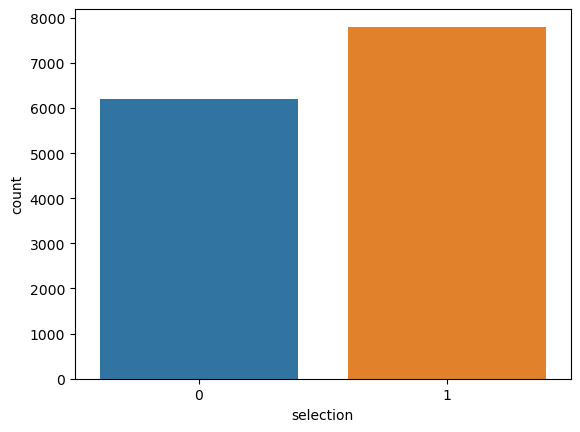

In [13]:
sns.countplot(x='selection',data=data)

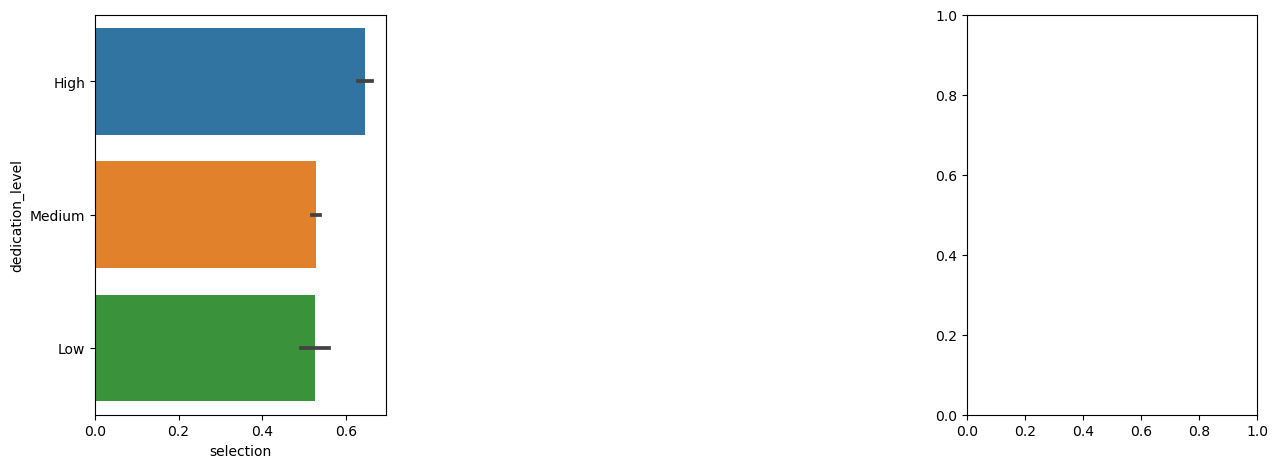

In [14]:
plt.figure(figsize=(15,5))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)

plt.subplot(131)

sns.barplot(x="selection", y="dedication_level", data=data)
plt.subplot(133)


plt.show()

Percentage of players who got Selection

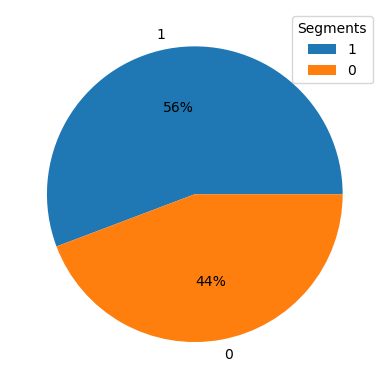

In [15]:
plt.pie(data.selection.value_counts(), labels=data.selection.value_counts().index,autopct='%.0f%%')
plt.legend(title='Segments')
plt.show()

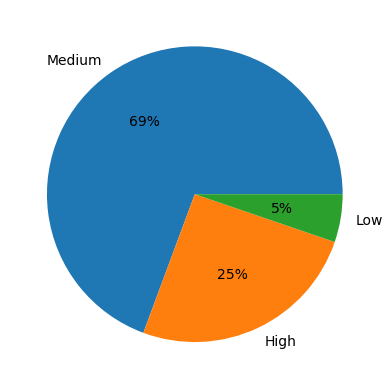

In [16]:
plt.pie(data.dedication_level.value_counts(), labels=data.dedication_level.value_counts().index,autopct='%.0f%%')
plt.show()

From above plot, we can see that 25% have high dedication level, 69% have medium and 5% have low dedication level

<Axes: xlabel='strong_foot', ylabel='count'>

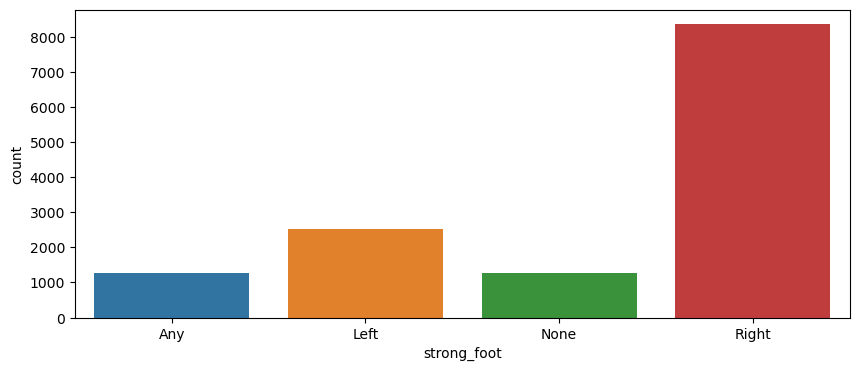

In [17]:
plt.figure(figsize=(10,4))
sns.countplot(x = data.strong_foot.sort_values())


Checking Missing values

In [22]:
data.isna().sum()

player_id                      0
name                           0
age                            0
gender                        19
country                        0
height                         0
weight                       417
ball_controlling_skills      413
body_reflexes                  0
body_balance                   0
jumping_skills                24
penalties_conversion_rate     30
mental_strength               28
goalkeeping_skills             0
defending_skills               0
passing_skills                 0
dribbling_skills               0
shot_accuracy                572
body_strength_stamina          0
max_running_speed              0
strong_foot                  552
behaviour_rating             703
matches_played               666
fitness_rating               695
trophies_won                   0
dedication_level               0
coaching                     125
years_of_experience          144
no_of_disqualifications        0
selection                      0
dtype: int

In [24]:
# Generating correlation coefficient between each features

from pandas import set_option
set_option("display.precision",3)
correlation=data.corr(method='pearson')
correlation

/var/folders/rh/zmjyr39j5y9_jmlgy4_cl6600000gp/T/ipykernel_3172/4196943028.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=data.corr(method='pearson')


,age,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,mental_strength,goalkeeping_skills,defending_skills,passing_skills,...,shot_accuracy,body_strength_stamina,max_running_speed,behaviour_rating,matches_played,fitness_rating,trophies_won,years_of_experience,no_of_disqualifications,selection
age,1.000,0.083,-0.009,-0.058,0.144,0.124,0.315,0.077,0.157,0.154,...,0.149,0.201,-0.131,0.374,0.211,0.079,0.031,0.841,-0.011,-0.162
ball_controlling_skills,0.083,1.000,0.702,0.604,0.205,0.770,0.698,-0.788,0.600,0.897,...,0.897,0.552,0.685,0.457,0.213,0.724,0.272,0.092,-0.008,0.266
body_reflexes,-0.009,0.702,1.000,0.761,0.226,0.564,0.450,-0.537,0.297,0.672,...,0.657,0.276,0.798,0.284,0.088,0.572,0.236,-0.021,-0.016,0.163
body_balance,-0.058,0.604,0.761,1.000,0.201,0.486,0.338,-0.520,0.289,0.584,...,0.542,0.129,0.687,0.159,0.041,0.483,0.198,-0.075,-0.013,0.101
jumping_skills,0.144,0.205,0.226,0.201,1.000,0.136,0.264,-0.205,0.326,0.158,...,0.187,0.404,0.245,0.267,0.113,0.363,0.057,0.156,-0.011,0.085
penalties_conversion_rate,0.124,0.770,0.564,0.486,0.136,1.000,0.569,-0.632,0.306,0.691,...,0.873,0.392,0.543,0.354,0.213,0.519,0.248,0.142,-0.012,0.177
mental_strength,0.315,0.698,0.450,0.338,0.264,0.569,1.000,-0.424,0.522,0.712,...,0.685,0.529,0.384,0.665,0.363,0.544,0.228,0.368,-0.002,0.319
goalkeeping_skills,0.077,-0.788,-0.537,-0.520,-0.205,-0.632,-0.424,1.000,-0.660,-0.661,...,-0.718,-0.546,-0.626,-0.079,-0.005,-0.704,-0.177,0.098,0.014,-0.047
defending_skills,0.157,0.600,0.297,0.289,0.326,0.306,0.522,-0.660,1.000,0.637,...,0.465,0.680,0.335,0.390,0.157,0.700,0.100,0.178,0.001,0.154
passing_skills,0.154,0.897,0.672,0.584,0.158,0.691,0.712,-0.661,0.637,1.000,...,0.849,0.501,0.595,0.513,0.255,0.686,0.265,0.179,-0.008,0.258


/var/folders/rh/zmjyr39j5y9_jmlgy4_cl6600000gp/T/ipykernel_3172/3817510204.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), ax=ax, annot=True)


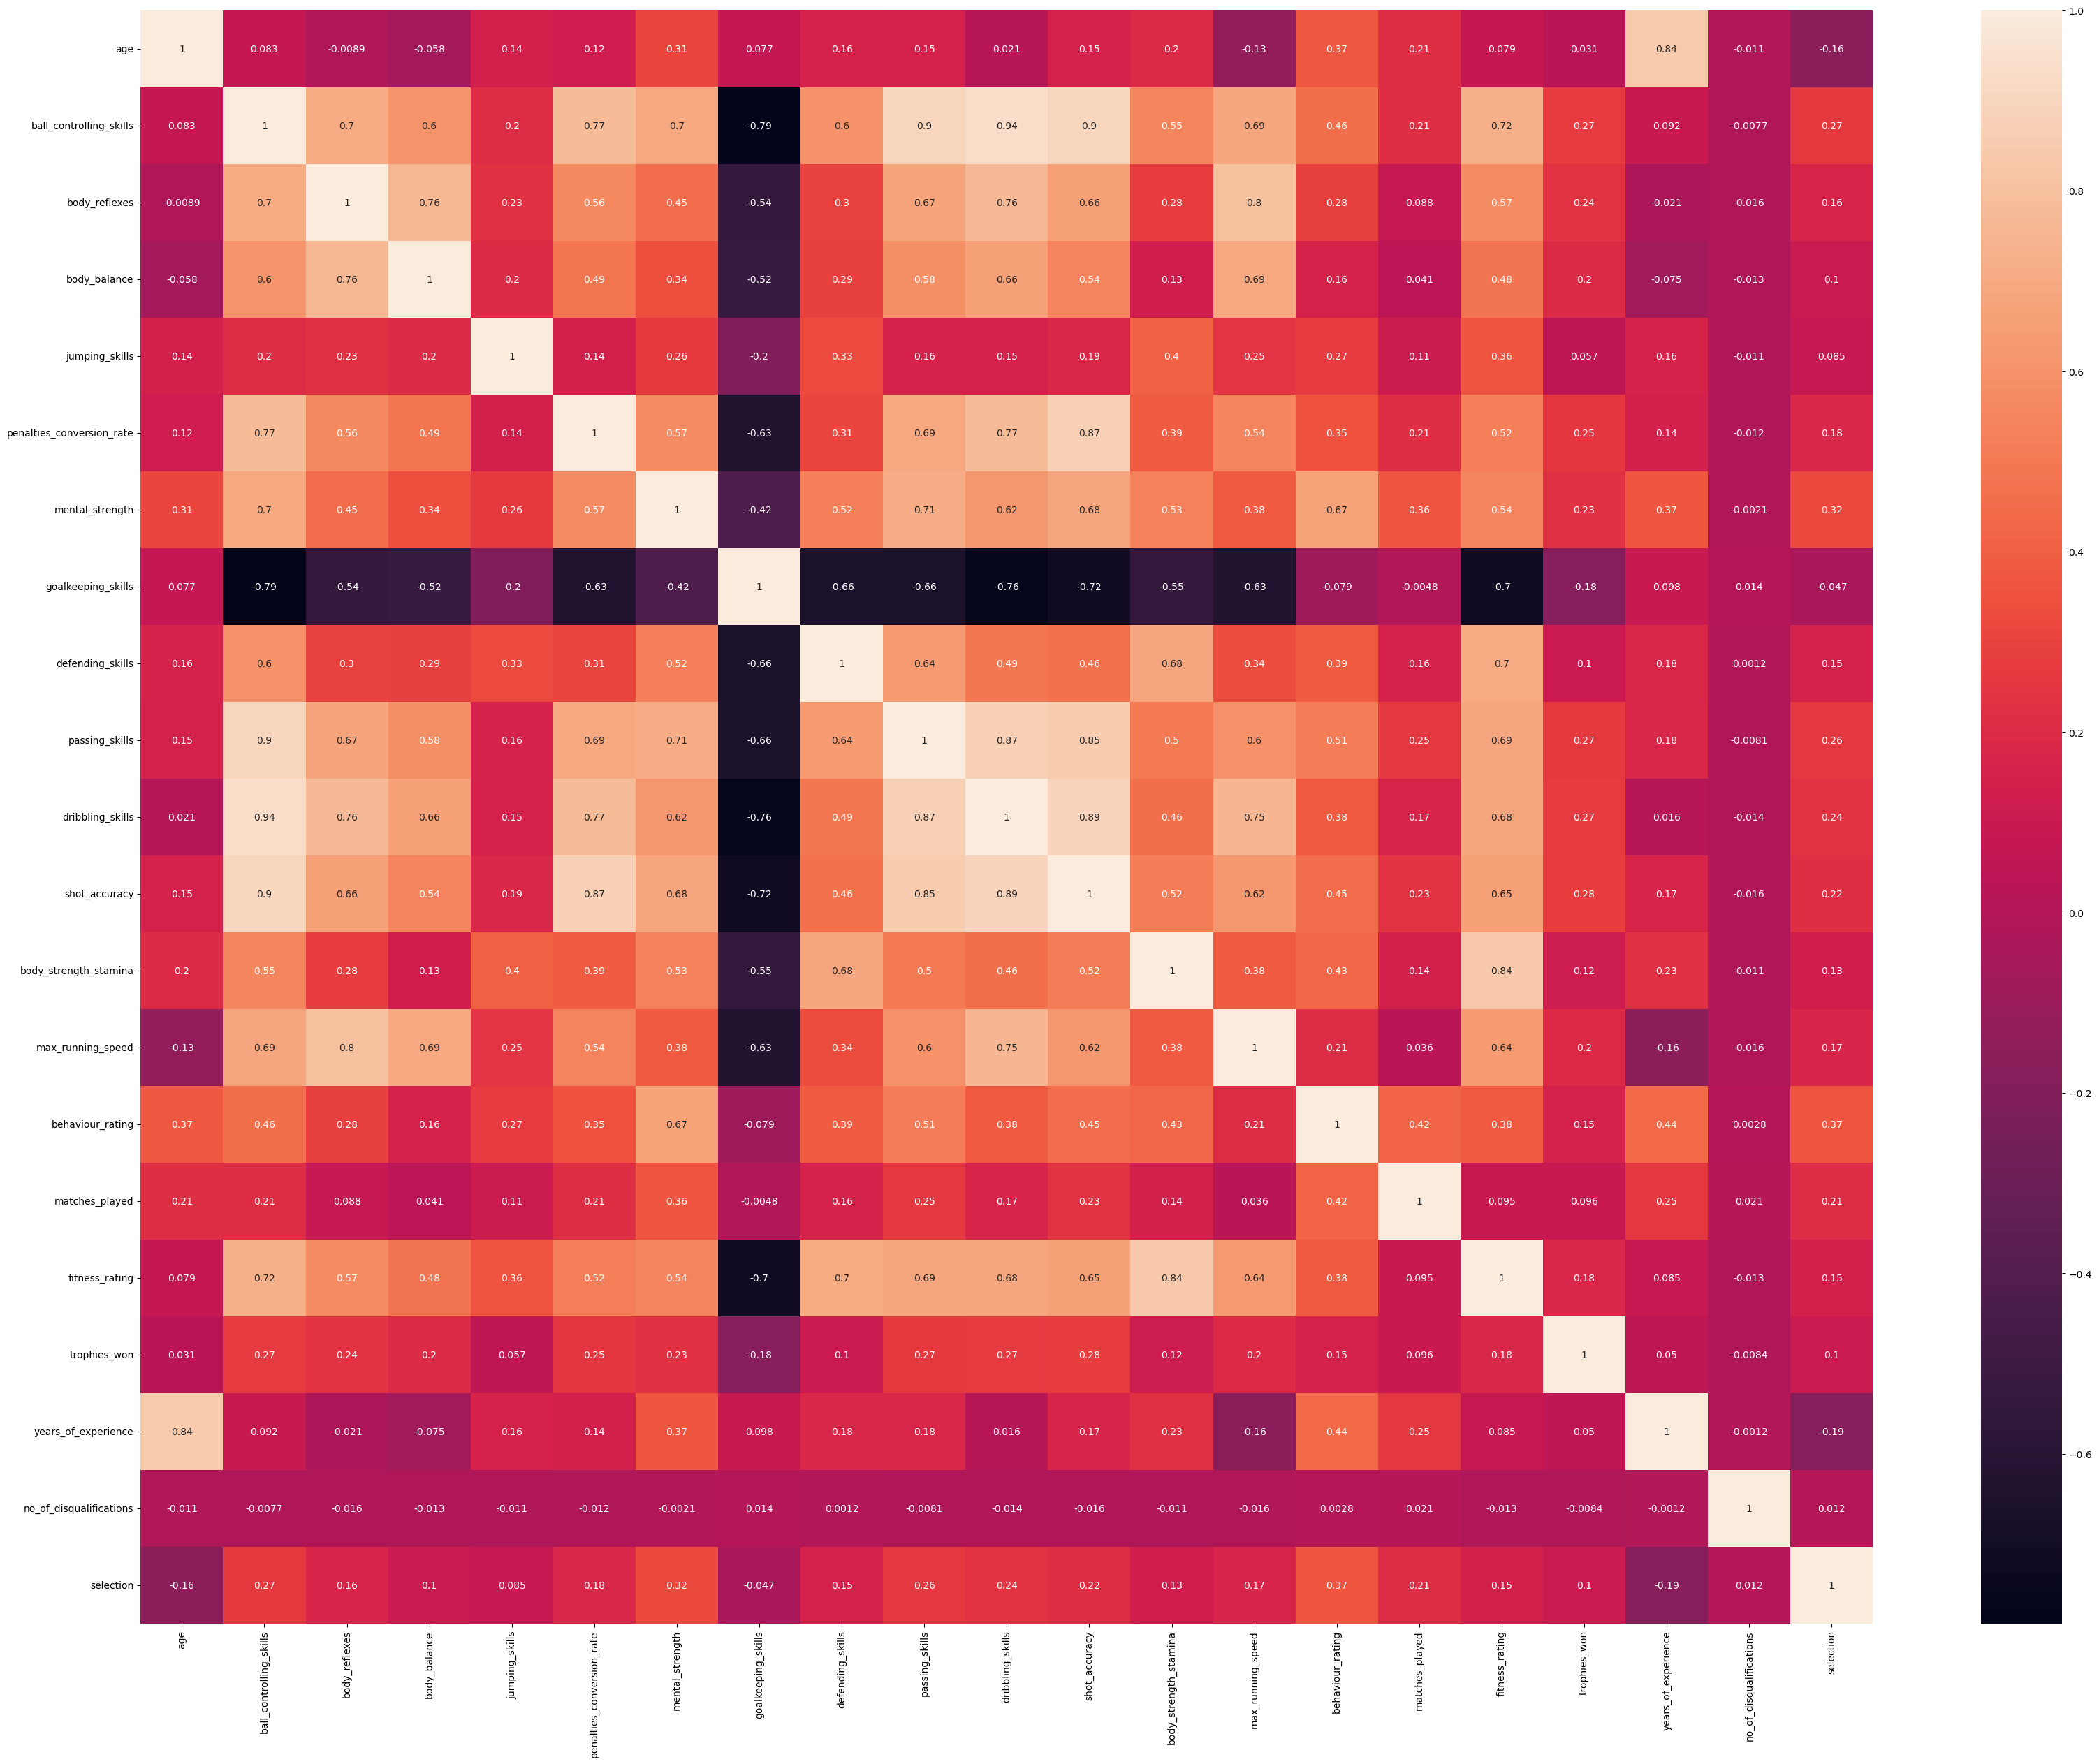

In [26]:
#Correlation Heatmap plot of whole dataset
# Plot correlation matrix in heatmap

fig, ax = plt.subplots(figsize=(40, 30))
sns.heatmap(data.corr(), ax=ax, annot=True)
plt.show()

# Data Preprocessing


Handling missing values

In [28]:
data.isnull().sum()

player_id                      0
name                           0
age                            0
gender                        19
country                        0
height                         0
weight                       417
ball_controlling_skills      413
body_reflexes                  0
body_balance                   0
jumping_skills                24
penalties_conversion_rate     30
mental_strength               28
goalkeeping_skills             0
defending_skills               0
passing_skills                 0
dribbling_skills               0
shot_accuracy                572
body_strength_stamina          0
max_running_speed              0
strong_foot                  552
behaviour_rating             703
matches_played               666
fitness_rating               695
trophies_won                   0
dedication_level               0
coaching                     125
years_of_experience          144
no_of_disqualifications        0
selection                      0
dtype: int

Handling numerical columns 

In [73]:
cols =data[['ball_controlling_skills', 'jumping_skills', 'penalties_conversion_rate', 'mental_strength', 'shot_accuracy', 'behaviour_rating', 'matches_played', 'fitness_rating', 'years_of_experience']]
for i in cols:
    data[i].fillna(data[i].mean(), inplace=True)

In [74]:
data.isnull().sum()

age                          0
gender                       0
height                       0
weight                       0
ball_controlling_skills      0
body_reflexes                0
body_balance                 0
jumping_skills               0
penalties_conversion_rate    0
mental_strength              0
goalkeeping_skills           0
defending_skills             0
passing_skills               0
dribbling_skills             0
shot_accuracy                0
body_strength_stamina        0
max_running_speed            0
strong_foot                  0
behaviour_rating             0
matches_played               0
fitness_rating               0
trophies_won                 0
dedication_level             0
coaching                     0
years_of_experience          0
no_of_disqualifications      0
selection                    0
dtype: int64

Handling categorical columns

In [75]:
cols=data[['gender', 'weight', 'strong_foot', 'coaching']]
for i in cols:
    data[i].fillna(data[i].mode().iloc[0], inplace=True)

In [76]:
data.isnull().sum()

age                          0
gender                       0
height                       0
weight                       0
ball_controlling_skills      0
body_reflexes                0
body_balance                 0
jumping_skills               0
penalties_conversion_rate    0
mental_strength              0
goalkeeping_skills           0
defending_skills             0
passing_skills               0
dribbling_skills             0
shot_accuracy                0
body_strength_stamina        0
max_running_speed            0
strong_foot                  0
behaviour_rating             0
matches_played               0
fitness_rating               0
trophies_won                 0
dedication_level             0
coaching                     0
years_of_experience          0
no_of_disqualifications      0
selection                    0
dtype: int64

In [77]:
#AS Playerid , Name and country has no impact for selection prediction dropping them
data.drop(["player_id","name","country"],axis=1,inplace=True)

KeyError: "['player_id', 'name', 'country'] not found in axis"

# Encoding

In [78]:
le = LabelEncoder()
data['gender'] = le.fit_transform(data['gender'])
data['height'] = le.fit_transform(data['height'])
data['weight'] = le.fit_transform(data['weight'])
data['strong_foot'] = le.fit_transform(data['strong_foot'])
data['strong_foot'] = le.fit_transform(data['strong_foot'])
data['coaching'] = le.fit_transform(data['coaching'])
data['dedication_level'] = le.fit_transform(data['dedication_level'])

In [79]:
data.head()

,age,gender,height,weight,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,mental_strength,...,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
0,23,1,18,47,77.0,58.0,47.0,59.0,41.0,73.0,...,3,7.700,3.908,8.100,2.0,0,2,8.0,0.0,1
1,18,1,5,24,54.0,69.0,70.0,62.0,53.0,43.0,...,0,5.300,0.000,6.405,3.0,2,1,3.0,0.0,0
2,16,0,18,44,34.0,43.0,45.0,69.0,49.0,45.0,...,1,4.700,0.000,6.600,5.0,1,0,2.0,0.0,1
3,27,1,6,38,79.0,73.0,76.0,86.0,81.0,80.0,...,3,8.600,113.000,8.600,6.0,2,0,13.0,16.0,1
4,19,0,13,32,47.0,61.0,74.0,57.0,49.0,35.0,...,3,5.822,0.000,5.700,5.0,2,0,4.0,0.0,0


Min Max Scaling

In [80]:
x = data.drop('selection',axis=1)

In [81]:
y = data['selection']

In [82]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [84]:
# Fit and transform the data to perform Min-Max scaling
x_scaled = scaler.fit_transform(x)
x_scaled=pd.DataFrame(x_scaled,columns=x.columns)
x_scaled.head()

,age,gender,height,weight,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,mental_strength,...,max_running_speed,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications
0,0.156,0.5,0.600,0.534,0.800,0.548,0.432,0.556,0.400,0.771,...,0.642,0.75,0.727,0.026,0.789,0.222,0.0,0.50,0.28,0.976
1,0.044,0.5,0.167,0.273,0.544,0.679,0.693,0.593,0.541,0.410,...,0.581,0.00,0.416,0.000,0.601,0.333,1.0,0.25,0.08,0.976
2,0.000,0.0,0.600,0.500,0.322,0.369,0.409,0.679,0.494,0.434,...,0.601,0.25,0.338,0.000,0.622,0.556,0.5,0.00,0.04,0.976
3,0.244,0.5,0.200,0.432,0.822,0.726,0.761,0.889,0.871,0.855,...,0.534,0.75,0.844,0.748,0.844,0.667,1.0,0.00,0.48,0.991
4,0.067,0.0,0.433,0.364,0.467,0.583,0.739,0.531,0.494,0.313,...,0.608,0.75,0.483,0.000,0.522,0.556,1.0,0.00,0.12,0.976


# Splitting of data

In [86]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

# Modelling

Logistic Regression model

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [88]:
lr_model = LogisticRegression(random_state=42)
lr_model.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [89]:
lr_y_pred = lr_model.predict(x_test)

In [91]:
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, lr_y_pred))
print(classification_report(y_test, lr_y_pred))


Logistic Regression:
Accuracy: 0.7727759914255091
              precision    recall  f1-score   support

           0       0.78      0.71      0.74      1286
           1       0.77      0.83      0.80      1513

    accuracy                           0.77      2799
   macro avg       0.77      0.77      0.77      2799
weighted avg       0.77      0.77      0.77      2799



Decision Tree


In [92]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train, y_train)


DecisionTreeClassifier(random_state=42)

In [93]:
dt_y_pred = dt_model.predict(x_test)

In [94]:
print("Decision Tree:")
print("Accuracy:", accuracy_score(y_test, dt_y_pred))
print(classification_report(y_test, dt_y_pred))


Decision Tree:
Accuracy: 0.781707752768846
              precision    recall  f1-score   support

           0       0.77      0.75      0.76      1286
           1       0.79      0.81      0.80      1513

    accuracy                           0.78      2799
   macro avg       0.78      0.78      0.78      2799
weighted avg       0.78      0.78      0.78      2799



Random Forest

In [96]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [97]:
rf_y_pred = rf_model.predict(x_test)

In [102]:
print("Random Forest:")
print("Accuracy:", accuracy_score(y_test, rf_y_pred))
print(classification_report(y_test, rf_y_pred))

Random Forest:
Accuracy: 0.8553054662379421
              precision    recall  f1-score   support

           0       0.86      0.81      0.84      1286
           1       0.85      0.89      0.87      1513

    accuracy                           0.86      2799
   macro avg       0.86      0.85      0.85      2799
weighted avg       0.86      0.86      0.85      2799



# KNN Model

In [99]:
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]
neighbors=np.arange(3,15)

In [100]:
for k in neighbors:
  knn_model=KNeighborsClassifier(n_neighbors=k,metric='euclidean')
  knn_model.fit(x_train,y_train)
  # Make predictions on the test set
  knn_y_pred=knn_model.predict(x_test)
  acc=accuracy_score(y_test,knn_y_pred)
  metric_k.append(acc)

In [101]:
knn_model=KNeighborsClassifier(n_neighbors=3,metric='euclidean')
knn_model.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [103]:
knn_y_pred=knn_model.predict(x_test)

In [104]:
print("KNN Model:")
print("Accuracy:", accuracy_score(y_test, knn_y_pred))
print(classification_report(y_test, knn_y_pred))

KNN Model:
Accuracy: 0.7206145051804216
              precision    recall  f1-score   support

           0       0.71      0.66      0.68      1286
           1       0.73      0.77      0.75      1513

    accuracy                           0.72      2799
   macro avg       0.72      0.72      0.72      2799
weighted avg       0.72      0.72      0.72      2799



SVM Model

In [105]:
from sklearn.svm import SVC
svm_model=SVC(kernel='linear')
svm_model.fit(x_train,y_train)

SVC(kernel='linear')

In [106]:
svm_y_pred=svm_model.predict(x_test)

In [107]:
print("SVM Model:")
print("Accuracy:", accuracy_score(y_test, svm_y_pred))
print(classification_report(y_test, svm_y_pred))

SVM Model:
Accuracy: 0.7745623436941765
              precision    recall  f1-score   support

           0       0.77      0.73      0.75      1286
           1       0.78      0.81      0.80      1513

    accuracy                           0.77      2799
   macro avg       0.77      0.77      0.77      2799
weighted avg       0.77      0.77      0.77      2799



From above models, can see accuracy is higher for RandomForestClassifier

Hence, the selected model is RandomForestClassifier